In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

In [2]:
import csv

with open('ALMApadlocations.txt', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    data = list(reader)

print(data)

[['[[5.606192499', ' 7.646657746', ' -2.087775605', " 'A001']", ' [22.0465959', ' 10.78995868', ' -2.085737713', " 'A002']", ' [16.9413543', ' 28.41476916', ' -2.082643323', " 'A003']", ' [34.07993959', ' -3.391862608', ' -2.089849501', " 'A004']", ' [64.74618649', ' -24.03185156', ' -2.090094746', " 'A005']", ' [60.44668677', ' -1.065310291', ' -2.089494285', " 'A006']", ' [55.4353013', ' 19.72317522', ' -2.087556286', " 'A007']", ' [48.98284', ' 33.32294429', ' -2.489031714', " 'A008']", ' [29.66575936', ' 56.57212469', ' -2.485582693', " 'A009']", ' [18.60625963', ' 66.83839826', ' -2.201563745', " 'A010']", ' [77.32651615', ' -15.4773776', ' -2.239047365', " 'A011']", ' [76.2457283', ' -0.240951312', ' -2.489130594', " 'A012']", ' [40.46709479', ' 17.74387371', ' -2.083880734', " 'A013']", ' [55.91553453', ' 46.82567975', ' -2.487390373', " 'A014']", ' [50.24060942', ' 60.83113893', ' -2.48917588', " 'A015']", ' [18.88013306', ' 86.49162757', ' -2.293650599', " 'A016']", ' [32.7889

In [3]:
my_file = open("ALMApadlocations.txt", "r")
  
# reading the file
data = my_file.read()
  
# replacing end of line('/n') with ' ' and
# splitting the text it further when '.' is seen.
data_into_list = data.replace('\n', '').replace('[', '').replace(']', '').replace("'", '').replace(" ", '').replace("0/n", '').split(",")
  
# printing the data
#print(data_into_list)
my_file.close()
data_into_list[5]

'10.78995868'

In [4]:
def list_slice(S, step):
    return [S[i::step] for i in range(step)]


H=list_slice(data_into_list,4)

In [5]:
Hdict=dict({'ArrayCenterRelNorth': H[0],'ArrayCenterRelEast':H[1],'ArrayCenterRelVertical':H[2],'antenna':H[3]})
print(Hdict)

{'ArrayCenterRelNorth': ['5.606192499', '22.0465959', '16.9413543', '34.07993959', '64.74618649', '60.44668677', '55.4353013', '48.98284', '29.66575936', '18.60625963', '77.32651615', '76.2457283', '40.46709479', '55.91553453', '50.24060942', '18.88013306', '32.78896049', '-1.738279307', '-10.80422027', '-21.55636298', '-4.25931373', '-4.143362048', '-19.90369337', '-34.9743094', '-45.02243039', '-47.37263533', '-53.64302244', '-17.54996241', '-31.50495352', '-28.98020434', '-56.39987892', '-63.79576618', '-65.93883391', '-37.4023229', '13.45860758', '24.10057423', '-11.83400494', '-40.99650541', '-24.6896592', '-2.83937534', '16.40689162', '41.88285181', '56.60599032', '-40.56702918', '-24.00541606', '2.833032901', '19.84640161', '37.97693003', '69.85249282', '24.45367016', '-37.49002324', '-24.17916508', '-5.974014263', '19.23642304', '37.61611224', '51.70771618', '-21.20426091', '-5.850273514', '41.7952965', '34.21077978', '-17.86053802', '-40.04395462', '28.00573249', '67.07411455'

In [6]:
Hpd=pd.DataFrame(Hdict).rename({'antenna':'Pad Name'}, axis=1)
Hpd['ArrayCenterRelNorth']=Hpd['ArrayCenterRelNorth'].astype('float')
Hpd['ArrayCenterRelEast']=Hpd['ArrayCenterRelEast'].astype('float')
Hpd['ArrayCenterRelVertical']=Hpd['ArrayCenterRelVertical'].astype('float')
Hpd

,ArrayCenterRelNorth,ArrayCenterRelEast,ArrayCenterRelVertical,Pad Name
0,5.606192,7.646658,-2.087776,A001
1,22.046596,10.789959,-2.085738,A002
2,16.941354,28.414769,-2.082643,A003
3,34.079940,-3.391863,-2.089850,A004
4,64.746186,-24.031852,-2.090095,A005
...,...,...,...,...
188,-47.707440,178.250401,-2.088881,T701
189,-42.196373,118.735635,-2.085730,T702
190,24.316696,125.308727,-2.381608,T703
191,24.344228,180.865375,-2.092522,T704


In [13]:
pad_map = pd.read_csv('antenna_to_pad_map.csv')
pad_map_tfm = pd.melt(pad_map, id_vars = ['SHIFT_ENTRY_ID', 'month']).rename({'value':'Pad Name'}, axis=1)
pad_map_coord = pd.merge(pad_map_tfm, Hpd, 
                       on=['Pad Name'],
                       how='outer')

pad_map_coord=pad_map_coord.dropna()
pad_map_coord.head(20)


,SHIFT_ENTRY_ID,month,variable,Pad Name,ArrayCenterRelNorth,ArrayCenterRelEast,ArrayCenterRelVertical
72481,392177.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237
72482,392873.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237
72483,393400.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237
72484,393682.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237
72485,394168.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237
72486,394540.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237
72487,395263.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237
72488,395930.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237
72489,397107.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237
72490,398094.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237


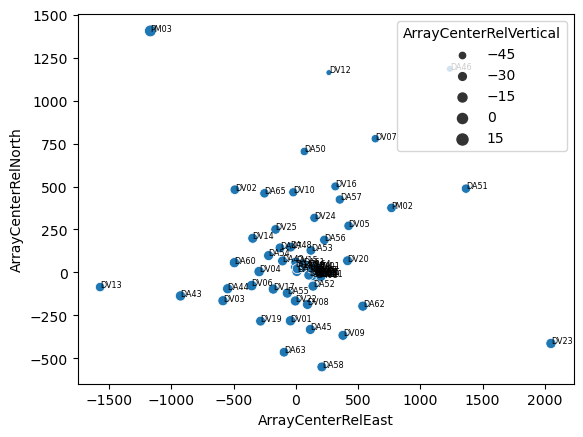

In [8]:
shift_entry='1116448'

sns.scatterplot(data=pad_map_coord.query('SHIFT_ENTRY_ID == '+shift_entry+''), 
                x="ArrayCenterRelEast", 
                y="ArrayCenterRelNorth",
                size='ArrayCenterRelVertical')


#plt.contour(pad_map_coord['ArrayCenterRelEast'], pad_map_coord['ArrayCenterRelNorth'], pad_map_coord['ArrayCenterRelVertical'], levels=5, linewidths=0.5, colors='k')
for i, point in pad_map_coord.query('SHIFT_ENTRY_ID == '+shift_entry+'').iterrows():
    plt.text(point['ArrayCenterRelEast']+.02, point['ArrayCenterRelNorth'], str(point['variable']), size='xx-small')
        

In [9]:
#adjust for plotly vertical
pad_map_coord['ArrayCenterRelVertical']= pad_map_coord['ArrayCenterRelVertical'] - pad_map_coord['ArrayCenterRelVertical'].min()

In [10]:
pad_map_coord['ArrayCenterRelVertical'].max()

472.09132638

In [11]:
shift_entry='1116448'

fig = px.scatter(pad_map_coord.query('SHIFT_ENTRY_ID == '+shift_entry+''), 
                 x="ArrayCenterRelEast", 
                 y="ArrayCenterRelNorth", 
                 text="variable",
                 #size='ArrayCenterRelVertical', 
                 hover_data=['Pad Name'])
fig.update_traces(textposition="bottom right")
fig.show()

## Link Pad Locations to Downtimes - Technical Categorizations and Specific Callouts

In [14]:
dt_dim = pd.read_csv('downtimes_dimensions_prep.csv')
dt_events = pd.read_csv('downtimes_to_events.csv')
shifts_events = pd.read_csv('shifts_to_events.csv')

In [15]:
shifts_events.head()

,SHIFT_ENTRY_ID,EVENT_ENTRY_ID,EVENT_TYPE,month
0,986301,986582,8,2016-09
1,986301,986396,2,2016-09
2,986301,986398,7,2016-09
3,986301,986399,7,2016-09
4,986301,986401,2,2016-09


In [16]:
dt_events.head()

,DOWNTIME_ENTRY_ID,FAMILY_AFFECTED,EVENT_ENTRY_ID,EVENT_TYPE,month
0,720668,Total Power,720600,2,2014-12
1,720668,12 [m],720601,2,2014-12
2,720668,Total Power,720627,4,2014-12
3,720911,12 [m],720858,7,2014-12
4,720911,12 [m],720888,2,2014-12


In [17]:
dt_dim.head()

,DOWNTIME_ENTRY_ID,AUTHOR,START_TIME,END_TIME,DOWNTIME_DURATION_HOURS,DOWNTIME_TYPE,SUBJECT,STE,FAMILY_AFFECTED,month
0,570901,JVelasquez,2014-04-08T03:39:24.000Z,2014-04-08T04:03:24.000Z,0.40,Technical,other: DV11 container crashed,OSF-AOS,NaN,2014-04
1,570905,JVelasquez,2014-04-08T04:04:25.000Z,2014-04-08T12:00:25.000Z,7.93,Technical,other: DA47 FEnd warm,OSF-AOS,NaN,2014-04
2,570931,JVelasquez,2014-04-08T03:39:17.000Z,2014-04-08T05:56:17.000Z,2.28,Technical,other: CM11: ACD HOT,OSF-AOS,NaN,2014-04
3,573679,Gamel,2014-04-13T09:02:04.000Z,2014-04-13T09:02:05.000Z,0.00,Technical,PR 1: BL: AOS: FocusBandOffsets_Interf.py scri...,OSF-AOS,NaN,2014-04
4,573683,Gamel,2014-04-13T09:37:00.000Z,2014-04-13T09:37:01.000Z,0.00,Technical,PR 1: BL: AOS: DV18: antenna has wrong values ...,OSF-AOS,NaN,2014-04


In [18]:
pad_map_coord.head()

,SHIFT_ENTRY_ID,month,variable,Pad Name,ArrayCenterRelNorth,ArrayCenterRelEast,ArrayCenterRelVertical
72481,392177.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237
72482,392873.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237
72483,393400.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237
72484,393682.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237
72485,394168.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237


In [ ]:
pad_downtime = pd.merge(shifts_events, dt_events, on='EVENT_ENTRY_ID', how='inner')
pad_downtime = pd.merge(pad_downtime, dt_dim, on='DOWNTIME_ENTRY_ID', how='inner')
pad_downtime = pd.merge(pad_map_coord, pad_downtime, on='SHIFT_ENTRY_ID', how='left')
pad_downtime

In [20]:
pd.set_option('display.max_columns', None)
C.dtypes

SHIFT_ENTRY_ID             float64
month_x                     object
variable                    object
Pad Name                    object
ArrayCenterRelNorth        float64
ArrayCenterRelEast         float64
ArrayCenterRelVertical     float64
EVENT_ENTRY_ID             float64
EVENT_TYPE_x               float64
month_x                     object
DOWNTIME_ENTRY_ID          float64
FAMILY_AFFECTED_x           object
EVENT_TYPE_y               float64
month_y                     object
AUTHOR                      object
START_TIME                  object
END_TIME                    object
DOWNTIME_DURATION_HOURS    float64
DOWNTIME_TYPE               object
SUBJECT                     object
STE                         object
FAMILY_AFFECTED_y           object
month_y                     object
dtype: object

In [21]:
pad_downtime

,SHIFT_ENTRY_ID,month_x,variable,Pad Name,ArrayCenterRelNorth,ArrayCenterRelEast,ArrayCenterRelVertical,EVENT_ENTRY_ID,EVENT_TYPE_x,month_x,DOWNTIME_ENTRY_ID,FAMILY_AFFECTED_x,EVENT_TYPE_y,month_y,AUTHOR,START_TIME,END_TIME,DOWNTIME_DURATION_HOURS,DOWNTIME_TYPE,SUBJECT,STE,FAMILY_AFFECTED_y,month_y
0,392177.0,2013-06,CM01,N602,-9.785640,173.166730,-2.090237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,392873.0,2013-06,CM01,N602,-9.785640,173.166730,-2.090237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,393400.0,2013-06,CM01,N602,-9.785640,173.166730,-2.090237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,393682.0,2013-06,CM01,N602,-9.785640,173.166730,-2.090237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,394168.0,2013-06,CM01,N602,-9.785640,173.166730,-2.090237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5536199,1118964.0,2017-07,PM04,T703,24.316696,125.308727,-2.381608,1119689.0,7.0,2017-07,1119669.0,12 [m],7.0,2017-07,Patricio,2017-07-24T11:54:05.000Z,2017-07-24T12:09:35.000Z,0.26,Technical,OTHER,OSF-APE1,12 [m],2017-07
5536200,1118964.0,2017-07,PM04,T703,24.316696,125.308727,-2.381608,1119686.0,7.0,2017-07,1119669.0,12 [m],7.0,2017-07,Patricio,2017-07-24T11:54:05.000Z,2017-07-24T12:09:35.000Z,0.26,Technical,OTHER,OSF-APE1,12 [m],2017-07
5536201,1119695.0,2017-07,PM04,T703,24.316696,125.308727,-2.381608,1119690.0,7.0,2017-07,1119671.0,7 [m],7.0,2017-07,Patricio,2017-07-24T12:01:07.000Z,2017-07-24T12:08:48.000Z,0.13,Technical,OTHER,OSF-APE1,7 [m],2017-07
5536202,1594667.0,2019-08,PM04,T703,24.316696,125.308727,-2.381608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
dt_dim.SUBJECT = dt_dim.SUBJECT.str.replace('\n+', ' ', regex=True).str.strip()

In [54]:
K = dt_dim.SUBJECT.str.split(expand=True).stack().to_frame('token_str')
K.index.names = ['chunk_num','token_num']

In [55]:
K

token_str
chunk_num token_num           
0         0             other:
          1               DV11
          2          container
          3            crashed
1         0             other:
...                        ...
16469     4               site
16470     0               high
          1              phase
16471     0               high
          1              phase

[85188 rows x 1 columns]

In [56]:


K['term_str'] = K.token_str.str.replace(r'\W+', '', regex=True).str.lower()
K

token_str   term_str
chunk_num token_num                      
0         0             other:      other
          1               DV11       dv11
          2          container  container
          3            crashed    crashed
1         0             other:      other
...                        ...        ...
16469     4               site       site
16470     0               high       high
          1              phase      phase
16471     0               high       high
          1              phase      phase

[85188 rows x 2 columns]

In [57]:
K_ant = K.query("token_str.str.match('^([DV]{2}[0-9]{2})$') | token_str.str.match('^([CM]{2}[0-9]{2})$') | token_str.str.match('^([DA]{2}[0-9]{2})$') | token_str.str.match('^([PM]{2}[0-9]{2})$')")
K_ant

,,token_str,term_str
chunk_num,token_num,,
0,1,DV11,dv11
1,1,DA47,da47
5,2,DA41,da41
13,3,DA44,da44
23,3,DV21,dv21
...,...,...,...
16442,5,DA44,da44
16449,0,DV21,dv21
16454,2,DV24,dv24


In [58]:

V = K_ant.term_str.value_counts().to_frame('n')
V.index.name = 'term_str'



In [67]:
K_ant.reset_index()

,chunk_num,token_num,token_str,term_str
0,0,1,DV11,dv11
1,1,1,DA47,da47
2,5,2,DA41,da41
3,13,3,DA44,da44
4,23,3,DV21,dv21
...,...,...,...,...
2078,16442,5,DA44,da44
2079,16449,0,DV21,dv21
2080,16454,2,DV24,dv24
2081,16454,4,DA61,da61


In [60]:


V['p'] = V.n / V.n.sum()



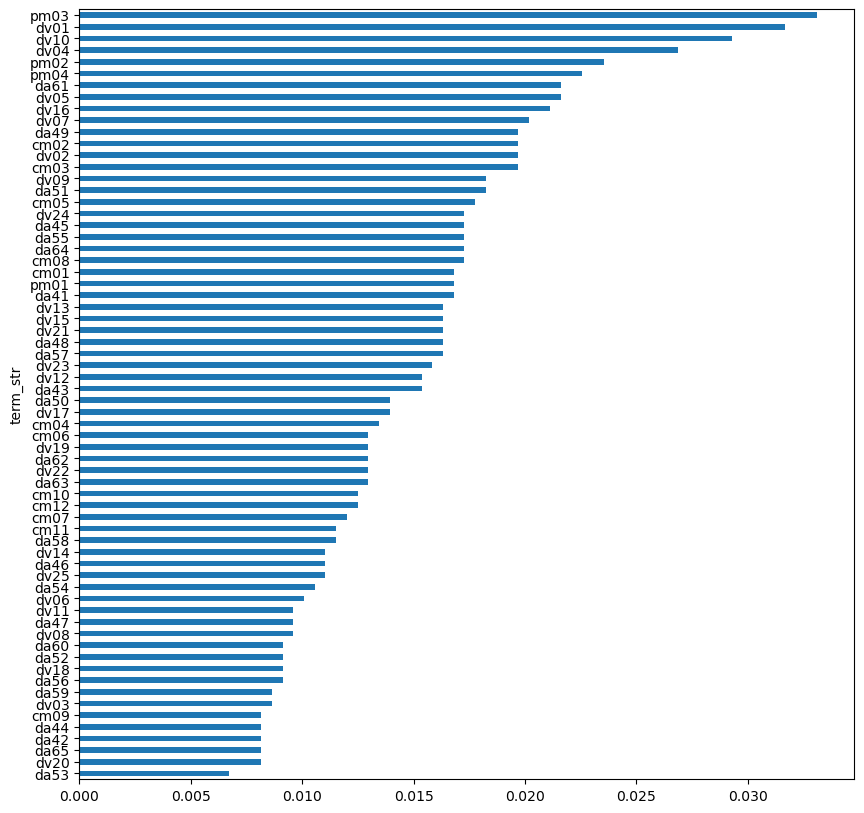

In [61]:
V.p.head(66).sort_values().plot.barh(figsize=(10,10));

In [63]:
V

,n,p
term_str,,
pm03,69,0.033125
dv01,66,0.031685
dv10,61,0.029285
dv04,56,0.026884
pm02,49,0.023524
...,...,...
cm09,17,0.008161
da44,17,0.008161
da42,17,0.008161


In [50]:
Hpd

,ArrayCenterRelNorth,ArrayCenterRelEast,ArrayCenterRelVertical,Pad Name
0,5.606192,7.646658,-2.087776,A001
1,22.046596,10.789959,-2.085738,A002
2,16.941354,28.414769,-2.082643,A003
3,34.079940,-3.391863,-2.089850,A004
4,64.746186,-24.031852,-2.090095,A005
...,...,...,...,...
188,-47.707440,178.250401,-2.088881,T701
189,-42.196373,118.735635,-2.085730,T702
190,24.316696,125.308727,-2.381608,T703
191,24.344228,180.865375,-2.092522,T704


In [65]:
pad_downtime.head()


,SHIFT_ENTRY_ID,month_x,variable,Pad Name,ArrayCenterRelNorth,ArrayCenterRelEast,ArrayCenterRelVertical,EVENT_ENTRY_ID,EVENT_TYPE_x,month_x,DOWNTIME_ENTRY_ID,FAMILY_AFFECTED_x,EVENT_TYPE_y,month_y,AUTHOR,START_TIME,END_TIME,DOWNTIME_DURATION_HOURS,DOWNTIME_TYPE,SUBJECT,STE,FAMILY_AFFECTED_y,month_y
0,392177.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,392873.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,393400.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,393682.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,394168.0,2013-06,CM01,N602,-9.78564,173.16673,-2.090237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
pad_map.head()

,SHIFT_ENTRY_ID,CM01,CM02,CM03,CM04,CM05,CM06,CM07,CM08,CM09,CM10,CM11,CM12,DA41,DA42,DA43,DA44,DA45,DA46,DA47,DA48,DA49,DA50,DA51,DA52,DA53,DA54,DA55,DA56,DA57,DA58,DA59,DA60,DA61,DA62,DA63,DA64,DA65,DV01,DV02,DV03,DV04,DV05,DV06,DV07,DV08,DV09,DV10,DV11,DV12,DV13,DV14,DV15,DV16,DV17,DV18,DV19,DV20,DV21,DV22,DV23,DV24,DV25,PM01,PM02,PM03,PM04,month
0,68957,NaN,NaN,NaN,NaN,NaN,TF09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TF05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TF03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TF07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TF01,TF08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01
1,68987,NaN,NaN,NaN,NaN,NaN,TF09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TF05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TF03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TF07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TF01,TF08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01
2,392177,N602,J502,J503,N605,J506,N606,N601,J505,N603,J501,N604,J504,A079,A050,A075,A068,A070,A067,A026,A046,A029,A045,A017,A035,A038,A063,A054,A064,A076,A087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A081,A077,A137,A004,A082,A037,A096,A021,A060,A071,A031,NaN,A072,A025,A074,A069,A138,A080,A117,A020,A015,A011,A007,A131,A106,T704,T702,T701,T703,2013-06
3,392266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TF01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TF03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06
4,392289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TF01,TF02,NaN,W201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06


In [69]:
pad_map['PM03'].dropna()

2       T701
5       T701
7       T701
9       T701
11      T701
        ... 
5918    T702
5919    T702
5920    T702
5921    T702
5922    T702
Name: PM03, Length: 4941, dtype: object

In [72]:
pm03_df = pad_map['PM03'].value_counts().to_frame('n')
dv01_df = pad_map['DV01'].value_counts().to_frame('n')
dv10_df = pad_map['DV10'].value_counts().to_frame('n')
dv04_df = pad_map['DV04'].value_counts().to_frame('n')


## Need to find worst performing pads

In [71]:
pm03_df

,n
T701,2338
T702,1135
A134,366
A076,259
A131,210
TF07,155
A121,132
A028,113
A026,93
S303,56


In [73]:
dv01_df

,n
A072,1025
A045,688
A033,506
A001,418
A022,325
A065,303
A081,250
A127,221
A118,192
A129,177


In [74]:
dv10_df

,n
A071,1283
A062,666
A024,556
A135,478
A048,353
A087,307
A126,209
A096,198
A025,193
A029,166


In [75]:
dv04_df

,n
A004,963
A007,686
A066,506
A078,439
A015,393
A016,294
A011,280
A088,222
A093,180
A084,169
